Precisión del modelo supervisado: 1.0
Precisión del modelo semisupervisado: 0.8196994991652755


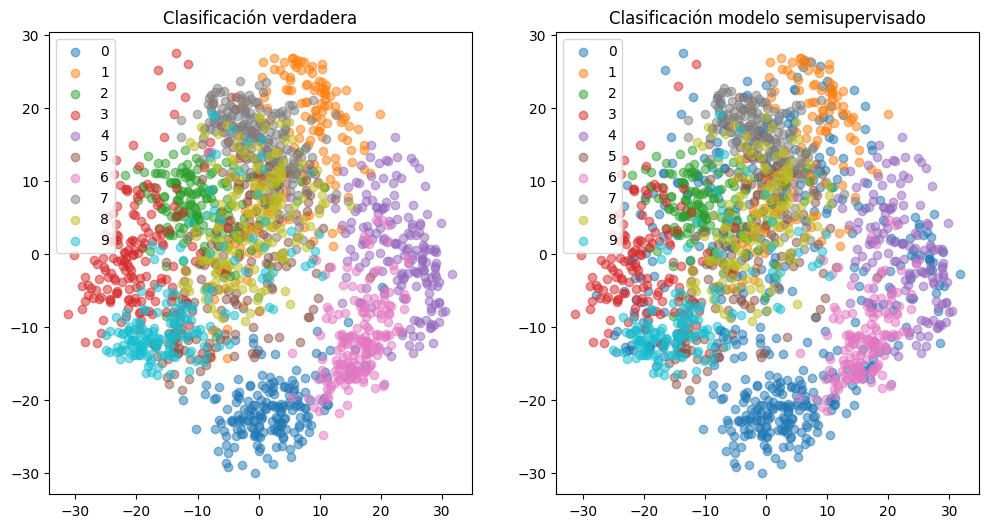

In [4]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Cargar el conjunto de datos de dígitos
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Dividir los datos en conjunto etiquetado y no etiquetado
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.8, random_state=42)

# Determinar la cantidad de datos a marcar como no etiquetados
porcentaje_no_etiquetados = 0.2  # Por ejemplo, se marcará el 50% de los datos como no etiquetados
num_no_etiquetados = int(len(y) * porcentaje_no_etiquetados)

# Inicializar y entrenar un modelo supervisado (Logistic Regression)
supervised_model = LogisticRegression(max_iter=10000)
supervised_model.fit(X_labeled, y_labeled)

# Calcular la precisión del modelo supervisado
accuracy_supervised = supervised_model.score(X_labeled, y_labeled)
print(f"Precisión del modelo supervisado: {accuracy_supervised}")

# Crear un conjunto de datos con datos etiquetados y no etiquetados para el modelo semisupervisado
X_train = X.copy()
y_train = y.copy()
y_train[-num_no_etiquetados:] = -1  # Marcar el último 'num_no_etiquetados' como no etiquetados

# Inicializar y entrenar el modelo de propagación de etiquetas
label_prop_model = LabelSpreading()
label_prop_model.fit(X_train, y_train)

# Predecir en el conjunto de datos completo
predicted_labels = label_prop_model.transduction_

# Calcular la precisión del modelo semisupervisado
accuracy_semisupervised = accuracy_score(y, predicted_labels)
print(f"Precisión del modelo semisupervisado: {accuracy_semisupervised}")

# Reducir la dimensionalidad a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Visualizar los resultados
plt.figure(figsize=(12, 6))

# Gráfico para el modelo supervisado
plt.subplot(1, 2, 1)
for i in range(10):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], label=str(i), alpha=0.5)
plt.title('Clasificación verdadera')
plt.legend()

# Gráfico para el modelo semisupervisado
plt.subplot(1, 2, 2)
for i in range(10):
    plt.scatter(X_r[predicted_labels == i, 0], X_r[predicted_labels == i, 1], label=str(i), alpha=0.5)
plt.title('Clasificación modelo semisupervisado')
plt.legend()

plt.show()
